# TP2

#### Remis à M. Philippe Després
#### Pour le cours PHY-3500 - Physique Numérique

#### 4 mars 2022
#### Jordan Charest et Benjamin Claveau

## Constantes et packages

In [6]:
import numpy as np
import scipy as sp
from scipy import linalg
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns
import timeit


me =  9.1094 * 10**(-31) # kg
e =  1.602 * 10**(-19) # C
hbar = 1.056 * 10**(-34) # m^2 kg / s
pi = np.pi

## Question 1 - Une chaîne de résistors

### 1.

<center><img src="TP2_1" style="width: 800px;"/></center>
<center>Figure 1 - Schéma de la chaîne de résistors</center>


La loi des courants de Kirchhoff, aussi appelé loi de noeuds, nous dit que le courant total qui "arrive" dans un noeud est égal au courant total qui en sort. Mathématiquement, elle se traduit par:

$$I_1+I_2+...I_N=I_a+I_b+...I_M$$

Où les courants $1,2,3...N$ sont les courants entrants et les courants $a,b,c...M$ sont les courants sortant. Sachant la loi d'Ohm, soit:

$$V=RI$$

On peut exprimer le courant comme la différence de potentiel entre deux noeuds divisée par la résistance de la branche. Cela est utile dans un cas comme le nôtre puisque nous ne connaissons pas *a priori* le sens du courant. On peut donc écrire, par exemple, pour un noeud arbitraire $i$ entouré de noeuds arbitraires 1 à 3:

$$\frac{V_i-V_1}{R_1}+\frac{V_i-V_2}{R_2}+\frac{V_i-V_3}{R_3}=0$$

Si le potentiel du noeud $i$ est plus élevé que celui du noeud environnant, le courant "sortira" du noeud $i$, tandis que dans le cas contraire il y entrera; on constate qu'on a donc bel et bien la forme de la loi de Kirchhoff. Dans notre cas, étant donné que toutes les résistances sont identiques, on peut multiplier l'équation par $R$ pour n'avoir que les potentiels de chaque noeud dans l'équation.

Déterminons donc les équations dans notre système. En observant la figure, pour le noeud $1$, on a:

$$(V_1-V_+)+(V_1-V_2)+(V_1-V_3)=0$$
$$3V_1-V_2-V_3=V_+$$

Pour le noeud $2$:

$$(V_2-V_+)+(V_2-V_1)+(V_2-V_3)+(V_3-V_4)=0$$
$$-V_1-4V_2-V_3-V_4=V_+$$

À partir du noeud $3$, on arrive dans la zone des "noeuds centraux", c'est-à-dire que tous les noeuds sont semblables jusqu'à ce que nous arrivions à $N-1$. Déterminons donc les équations de $3$ et $4$ et voyons si on peut généraliser l'équation pour tous les noeuds allant jusqu'à $N-2$ inclusivement.

Pour le noeud $3$, on a:

$$(V_3-V_1)+(V_3-V_2)+(V_3-V_4)+(V_3-V_5)=0$$
$$-V_1-V_2+4V_3-V_4-V_5=0$$

Pour le noeud $4$, on a:

$$(V_4-V_2)+(V_4-V_3)+(V_4-V_5)+(V_4-V_6)=0$$
$$-V_2-V_3+4V_4-V_5-V_6=0$$

En observant ces équations ainsi que le schéma, on peut généraliser pour un noeud arbitraire $i$ où $2<i<N-1$:

$$-V_{i-2}-V_{i-1}+4V_i-V_{i+1}-V_{i+2}=0$$

Pour les deux derniers noeuds, $N-1$ et $N$, on a le "miroir" des noeuds $1$ et $2$. En se référant au schéma, on remarque qu'on a les équations suivantes:

Noeud $N-1$:

$$(V_{N-1}-V_{N-3})+(V_{N-1}-V_{N-2})+(V_{N-1}-V_{N})+(V_{N-1}-0)=0$$
$$-V_{N-3}-V_{N-2}+4V_{N-1}-V_N=0$$

Noeud $N$:

$$(V_N-V_{N-2})+(V_{N}-V_{N-1})+(V_{N}-0)=0$$
$$-V_{N-2}-V_{N-1}+3V_N=0$$

On peut généraliser le système d'équations à $N$ équations suivant:

\begin{align*}
3V_1-V_2-V_3&=V_+\\
-V_1+4V_2-V_3-V_4&=V_+\\
&\vdots\\
-V_{i-2}-V_{i-1}+4V_i-V_{i+1}-V_{i+2}&=0\\
&\vdots\\
-V_{N-3}-V_{N-2}+4V_{N-1}-V_N&=0\\
-V_{N-2}-V_{N-1}+3V_N&=0
\end{align*}

C.Q.F.D.

### 2.

On peut mettre ces équations sous forme matricielle, soit:

$$\mathbf{Av}=\mathbf{w}$$

Où $\mathbf{A}$ est la matrice des coefficients, $\mathbf{v}$ la matrice des tensions, et $\mathbf{w}$ la matrice des côtés droits des équations précédemment déterminées. Alors on a pour le cas général:

\begin{bmatrix}
3&-1&-1&0&0&0&0&0&\dots&&&&&&0\\
-1&4&-1&-1&0&0&0&0&\dots&&&&&&0\\
-1&-1&4&-1&-1&0&0&0&\dots&&&&&&0\\
0&-1&-1&4&-1&-1&0&0&\dots&&&&&&0\\
\vdots&&&&&&&&\dots&&&&&&\vdots\\
0&\dots&&&&0&-1&-1&4&-1&-1&\dots&&&0\\
\vdots&&&&&&&&\dots&&&&&&\vdots\\
0&&&&&\dots&0&0&0&0&0&-1&-1&4&-1\\
0&&&&&\dots&0&0&0&0&0&0&-1&-1&3\\
\end{bmatrix}\begin{bmatrix}V_1\\V_2\\V_3\\V_4\\\vdots\\V_i\\\vdots\\V_{N-1}\\V_{N-2}\end{bmatrix}=\begin{bmatrix}V_+\\V_+\\0\\0\\\vdots\\0\\\vdots\\0\\0\end{bmatrix}

Dans le cas où $N=6$, on obtient le système suivant:

\begin{bmatrix}
3&-1&-1&0&0&0\\
-1&4&-1&-1&0&0\\
-1&-1&4&-1&-1&0\\
0&-1&-1&4&-1&-1\\
0&0&-1&-1&4&-1\\
0&0&0&-1&-1&3
\end{bmatrix}\begin{bmatrix}V_1\\V_2\\V_3\\V_4\\V_5\\V_6\end{bmatrix}=\begin{bmatrix}V_+\\V_+\\0\\0\\0\\0\\\end{bmatrix}

On souhaite écrire un programme capable de résoudre un tel système. On utilisera la fonction *solve* de scipy: cette fonction native de scipy est faite pour résoudre de tels systèmes, sera probablement plus efficace que celle que nous pourrions coder nous-mêmes, et nous permettra de conclure sur l'utilité de *solve* à $N=10000$. Débutons par créer un programme qui génère les matrices $\mathbf{A}$ et $\mathbf{w}$:

In [7]:
# But: générer les matrices A et w en vue de résoudre le système
# Arguments:
# N: nombre de noeuds du système
# V: valeur en volts de V+

# À noter que le code ne fonctionne pas pour les matrices avec N < 4

def matrices(N, V):
    A = np.zeros((N,N))
    w = np.zeros((N,1))

    w[0,0], w[1,0] = V, V

    A[0,0:3] = [3, -1, -1]
    A[1,0:4] = [-1, 4, -1, -1]

    for ran in range(N-4):
        A[ran+2,ran:(ran+5)] = [-1, -1, 4, -1, -1]
    
    A[N-2, N-4:N] = [-1, -1, 4, -1]
    A[N-1, N-3:N] = [-1, -1, 3]

    return A, w

On écrit maintenant un script pour résoudre la matrice ainsi obtenue. Débutons avec la matrice pour $N=6$:

In [8]:
# La fonction linalg.solve accepte deux paramètres obligatoires sous la forme
# linalg.solve(a,b), où a est la matrice des coefficients (A plus haut)
# et b est la matrice du côté droit des équations (w plus haut)

N = 6
V = 5

A, w = matrices(N, V)

x = linalg.solve(A, w)

print(f"La matrice de tensions pour un système à {N} noeuds est:\n",x)

La matrice de tensions pour un système à 6 noeuds est:
 [[3.7254902 ]
 [3.43137255]
 [2.74509804]
 [2.25490196]
 [1.56862745]
 [1.2745098 ]]


Tous les potentiels se situent entre 0 et 5, ce qui est attendu (on peut vérifier que c'est le cas pour n'importe quelle valeur de N). Pour générer un graphique des potentiels selon l'indice du noeud, on transforme l'*array* en liste et on génère une liste d'indices, puis on fait le graphique:

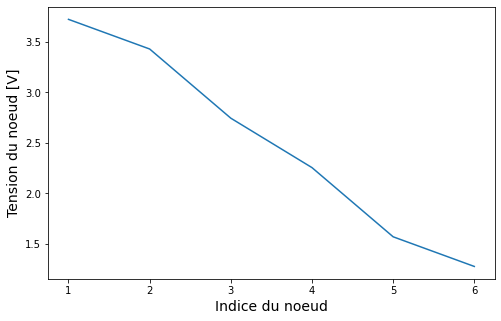

In [9]:
import matplotlib.pyplot as plt

def V_vs_noeud(N,V):

    A, w = matrices(N,V)
    x = linalg.solve(A, w)
    x = [e for n in x.tolist() for e in n]
    i = [n+1 for n in range(N)]

    V_vs_noeud_fig = plt.figure(figsize=(8,5))
    #plt.scatter(i, x)
    plt.plot(i, x)
    plt.xlabel('Indice du noeud', fontsize=14)
    plt.ylabel("Tension du noeud [V]", fontsize=14)
    plt.show()

V_vs_noeud(6,5)

Si désiré, on peut échanger *plt.plot* pour *plt.scatter* pour observer sous la forme de nuage de points. 

### 3.

On peut tenter de résoudre le système à l'aide de solve pour $N=10000$ noeuds:

In [10]:
A, w = matrices(10000, 5)

t1 = timeit.default_timer()
x = linalg.solve(A, w)
t2 = timeit.default_timer()

print(x)
print(f"Résolution avec linalg.solve: {t2-t1} secondes")

[[4.99888228e+00]
 [4.99861842e+00]
 [4.99802841e+00]
 ...
 [1.97158611e-03]
 [1.38158071e-03]
 [1.11772227e-03]]
Résolution avec linalg.solve: 19.399253999999928 secondes


On constate que le temps d'éxécution a beaucoup augmenté: il faut généralement entre 8-10 secondes afin de résoudre le système (selon le matériel utilisé et la charge de travail de l'ordinateur). Cela est dû au fait que, lorsque la matrice $\mathbf{A}$ est très grande, il y a énormément d'éléments (surtout des 0; le nombre d'éléments dans la matrice augmente proportionnellement à $N^2$), ce qui rend le système long à traiter. On peut utiliser le fait que la matrice est en bande, c'est-à-dire qu'il y a une bande de 5 éléments qui se répète diagonalement tout le long de la matrice. On peut employer la fonction *banded* du Newman pour résoudre plus efficacement. Cette fonction est donnée dans l'annexe E.2 [1] comme suit:

In [11]:
# Fonction banded tirée de l'annexe E.2 du Newman
# But: résoudre plus efficacement un système d'équations avec une matrice A à bande
# Arguments:
# Aa: matrice de coefficients
# va: matrice du côté droit du système d'équations
# up: nombre d'éléments non nuls au-dessus de la diagonale
# down: nombre d'éléments non nuls sous la diagonale

from numpy import copy

def banded(Aa,va,up,down):

    # Copy the inputs and determine the size of the system
    A = copy(Aa)
    v = copy(va)
    N = len(v)

    # Gaussian elimination
    for m in range(N):

        # Normalization factor
        div = A[up,m]

        # Update the vector first
        v[m] /= div
        for k in range(1,down+1):
            if m+k<N:
                v[m+k] -= A[up+k,m]*v[m]

        # Now normalize the pivot row of A and subtract from lower ones
        for i in range(up):
            j = m + up - i
            if j<N:
                A[i,j] /= div
                for k in range(1,down+1):
                    A[i+k,j] -= A[up+k,m]*A[i,j]

    # Backsubstitution
    for m in range(N-2,-1,-1):
        for i in range(up):
            j = m + up - i
            if j<N:
                v[m] -= A[i,j]*v[j]

    return v

Ici, en observant la forme générale de matrice obtenue au 1, on remarque qu'il y a deux éléments non nuls au-dessus de la diagonale, et deux éléments non nuls sous la diagonale (*up*=*down*=2). Cependant, on doit d'abord formater la matrice $\mathbf{A}$ pour qu'elle concorde avec la forme donnée dans le Newman (Figures E.2 et E.3). Voici les figures du Newman adaptées au cas présent, soit *up*=*down*=2, pour $N=6$:

$$\mathbf{A}=\begin{pmatrix}
a_{00}&a_{01}&a_{02}&&&\\
a_{10}&a_{11}&a_{12}&a_{13}&&\\
a_{20}&a_{21}&a_{22}&a_{23}&a_{24}&\\
&a_{31}&a_{32}&a_{33}&a_{34}&a_{35}\\
&&a_{42}&a_{43}&a_{44}&a_{45}\\
&&&a_{53}&a_{54}&a_{55}
\end{pmatrix}$$

"*That is, it has two nonzero elements above the diagonal, [two] below, and [five] 
nonzero diagonals in all. We would represent this with a [five]-row array A 
having elements as follows:*"

$$A=\begin{pmatrix}-&-&a_{02}&a_{13}&a_{24}&a_{35}\\
-&a_{01}&a_{12}&a_{23}&a_{34}&a_{45}\\
a_{00}&a_{11}&a_{22}&a_{33}&a_{44}&a_{55}\\
a_{10}&a_{21}&a_{32}&a_{43}&a_{54}&-\\
a_{20}&a_{31}&a_{42}&a_{53}&-&-\end{pmatrix}$$

Pour ce faire, on peut remarquer qu'on a simplement à "glisser" les éléments non nuls de chaque colonne à la bonne position. Nous n'avons pas besoin de remplacer les autres éléments par des zéros une fois l'opération terminée car, selon Newman:

*"The values in the elements marked "-" do not matter-you can put anything  in these elements and it will make no difference to the results."*

On peut donc se contenter de recopier les éléments aux endroits appropriés. Il faut ensuite retourner la matrice formattée en gardant seulement les 5 dernières lignes (*up*+*down*+1=5), soit les lignes où les diagonales ont été "redressées":

In [12]:
# But: formater la matrice A en vue de la résoudre à l'aide de la fonction banded de Newman
# Argument:
# A: matrice à formater

def format_A(A):
    n = 3
    N = len(A)
    for col in range(N):
        i = np.nonzero(A[:,col])[0]
        minimum = min(i)
        maximum = max(i)
        slice = A[minimum:(maximum+1),col]

        A[minimum+(N-n):maximum+(N-n+1),col] = slice
        n += 1
    
    return(A[-5:])

à noter que la fonction *format* codée ici fonctionne pour toutes les matrices de même forme que celle que nous utilisons ici, c'est à dire avec *up*=*down*=2. Pour d'autres valeurs de *up* et *down*, elle ne fonctionne pas. On constate que, pour $N=10000$, la matrice traitée par la fonction *solve* a $N^2=1\times10^8$ éléments, tandis que la matrice traitée par *banded* a $5*N=5\times10^4$ noeuds. Puisque la fonction *solve* a de façon générale besoin de traiter $N/5$ fois plus d'éléments (2000 fois plus avec $N=10000$), on comprend que la fonction *banded* aura probablement un temps d'éxécution plus bas.

On peut valider cette conclusion: on peut maintenant employer la fonction *banded* pour résoudre le système à $N=10000$ noeuds.

In [13]:
A, w = matrices(10000, 5)
A = format_A(A)

t1 = timeit.default_timer()
x = banded(A, w, 2, 2)
t2 = timeit.default_timer()

print(x)
print(f"Résolution avec banded: {t2-t1} secondes")

[[4.99888228e+00]
 [4.99861842e+00]
 [4.99802841e+00]
 ...
 [1.97158611e-03]
 [1.38158071e-03]
 [1.11772227e-03]]
Résolution avec banded: 0.6860811999999896 secondes


On constate qu'on arrive à la solution beaucoup plus rapidement avec la fonction *banded* (moins d'une seconde versus environ 9 secondes pour *solve*. Même en comptant le temps de reformater la matrice, on a besoin de seulement d'environ 3 secondes avec la méthode *banded*). On peut donc imaginer que, pour des systèmes beaucoup plus grands, l'efficacité de la fonction banded permettra de sauver beaucoup de temps. Essayons avec $N=15000$ (à noter que l'allocation maximale de mémoire de VSCode est d'environ 2 Gigaoctets, ce qui fait en sorte qu'il n'est pas possible d'essayer avec des matrices de taille beaucoup supérieure étant donné qu'on atteint 2 GB de préallocation pour une matrice d'environ $N=16000$)

In [14]:
N = 15000
V = 5
A, w = matrices(N, V)

t1 = timeit.default_timer()
x = linalg.solve(A, w)
t2 = timeit.default_timer()

print(f"Le temps pour résoudre un système de 15000 noeuds avec la fonction linalg.solve est de {t2-t1} secondes")

A = format_A(A)
t1 = timeit.default_timer()
x = banded(A, w, 2, 2)
t2 = timeit.default_timer()

print(f"Le temps pour résoudre un système de 15000 noeuds avec la fonction banded est de {t2-t1} secondes")

Le temps pour résoudre un système de 15000 noeuds avec la fonction linalg.solve est de 52.108953600000405 secondes
Le temps pour résoudre un système de 15000 noeuds avec la fonction banded est de 1.0590679000001728 secondes


Il faut approximativement 100 fois plus de temps pour résoudre le système avec *solve* qu'avec *banded*, et on peut supposer que cette différence augmentera avec la dimension de la matrice à résoudre. On en conclut donc que, pour des systèmes avec beaucoup de noeuds, la fonction *banded* est plus appropriée.

## Question 2 - Puits quantique asymétrique

### 4.

Tout d'abord, on sait que n'importe quel état $\psi(x)$ peut être représenté en série de Fourier selon la forme suivante :
$$\psi(x) = \sum_{n=1}^{\infty} \psi_n\sin\frac{n\pi x}{L}$$
En insérant l'état $\psi(x)$ sous cette forme dans l'équation de Schrödinger, on obtient
$$\hat{H}\psi(x) = E\psi(x)$$
$$\hat{H}\sum_{n=1}^{\infty} \psi_n\sin\frac{n\pi x}{L} = E\sum_{n=1}^{\infty} \psi_n\sin\frac{n\pi x}{L}$$
Par la distributivité de $\hat{H}$ et comme les $\psi_n$ sont des constantes, on a
$$\sum_{n=1}^{\infty} \psi_n\hat{H}\sin\frac{n\pi x}{L} = E\sum_{n=1}^{\infty} \psi_n\sin\frac{n\pi x}{L}$$
On multiplie $\sin\frac{m\pi x}{L}$ par les deux côtés de l'équation et on distribue sur les sommes :
$$\sum_{n=1}^{\infty} \psi_n\sin\frac{m\pi x}{L}\hat{H}\sin\frac{n\pi x}{L} = E\sum_{n=1}^{\infty} \psi_n\sin\frac{m\pi x}{L}\sin\frac{n\pi x}{L}$$
On intègre de 0 à $L$ des deux côtés de l'équation:
$$\int_0^L\sum_{n=1}^{\infty} \psi_n\sin\frac{m\pi x}{L}\hat{H}\sin\frac{n\pi x}{L}\text{d}x = \int_0^LE\sum_{n=1}^{\infty} \psi_n\sin\frac{m\pi x}{L}\sin\frac{n\pi x}{L}\text{d}x$$
$$\sum_{n=1}^{\infty} \psi_n\int_0^L\sin\frac{m\pi x}{L}\hat{H}\sin\frac{n\pi x}{L}\text{d}x = E\sum_{n=1}^{\infty} \psi_n\int_0^L\sin\frac{m\pi x}{L}\sin\frac{n\pi x}{L}\text{d}x$$
Or, on sait que
$$\int_0^L \sin\frac{m\pi x}{L}\sin\frac{n\pi x}{L}\text{d}x = 0 \qquad \text{pour $m\neq n$}$$
$$\int_0^L \sin\frac{m\pi x}{L}\sin\frac{n\pi x}{L}\text{d}x = \frac{L}{2} \qquad \text{pour $m=n$}$$
Tous les termes de la somme de droite seront donc nuls excepté celui où $n=m$. On a donc
$$\sum_{n=1}^{\infty} \psi_n\int_0^L\sin\frac{m\pi x}{L}\hat{H}\sin\frac{n\pi x}{L}\text{d}x = \frac{1}{2}LE\psi_m$$

En observant la forme de l'équation de Schrödinger obtenue pour la série de Fourier d'un état, on décide de poser des éléments de matrice $H_{mn}$ de la façon suivante :
$$H_{mn} = \frac{2}{L}\int_0^L\sin\frac{m\pi x}{L}\hat{H}\sin\frac{n\pi x}{L}\text{d}x$$

Cette définition nous permet de réécrire l'éqauation de Schrödinger sous une forme matricielle. En insérant $H_{mn}$ dans l'équation dérivée plus haut, on a
$$\sum_{n=1}^{\infty} \psi_n\frac{L}{2}H_{mn} = \frac{1}{2}LE\psi_m$$
$$\sum_{n=1}^{\infty} H_{mn} \psi_n = E\psi_m$$
On remarque que la partie gauche de l'équaiton correspond à une étape de la mutliplication matricielle de $\boldsymbol{H}$ et de $\boldsymbol{\psi}$ où on trouve l'élément $\psi_m$ de la matrice résultante. On remarque aussi que chaque élément de la matrice résultante est simplement l'élément de la matrice $\psi(x)$ multiplié par le facteur $E$. On voit donc que l'équation trouvée implique l'équation aux valeurs propres suivante :
$$\boldsymbol{H}\boldsymbol{\psi} = E\boldsymbol{\psi}$$
En définissant les éléments de la matrice $H$ de cette façon, on obtient donc que l'état $\psi(x)$ est un vecteur propre de l'Hamiltonien associé à la valeur propre E.

$$\textcolor{red}{\text{Ajouter du stock? Bonjour}}

### 5.

Le potentiel est donné par
$$V(x) = \frac{ax}{L}$$
Ce qui donne l'Hamiltonien suivant :
$$\hat{H} = \frac{-\hbar^2}{2M}\frac{\text{d}^2}{\text{d}x^2} + \frac{ax}{L}$$
Les éléments de de matrice $H_{mn}$ sont donc donnés par :
$$H_{mn} = \frac{2}{L}\int_0^L\sin\frac{m\pi x}{L}\bigg(\frac{-\hbar^2}{2M}\frac{\text{d}^2}{\text{d}x^2} + \frac{ax}{L}\bigg)\sin\frac{n\pi x}{L}\text{d}x$$
$$H_{mn} = \frac{2}{L}\int_0^L\sin\frac{m\pi x}{L}\bigg[\frac{-\hbar^2}{2M}\bigg(-\frac{\pi^2n^2}{L^2}\sin\frac{n\pi x}{L}\bigg) + \frac{ax}{L}\sin\frac{n\pi x}{L}\bigg]\text{d}x$$
$$H_{mn} = \frac{2}{L^2}\int_0^L\sin\frac{m\pi x}{L}\bigg[\frac{\hbar^2\pi^2n^2}{2ML}\sin\frac{n\pi x}{L} + ax\sin\frac{n\pi x}{L}\bigg]\text{d}x$$
$$H_{mn} = \frac{\hbar^2\pi^2n^2}{ML^3}\int_0^L\sin\frac{m\pi x}{L}\sin\frac{n\pi x}{L}\text{d}x + \frac{2a}{L^2}\int_0^Lx\sin\frac{m\pi x}{L}\sin\frac{n\pi x}{L}\text{d}x$$
Or, en plus des propriétés énoncées plus haut, on sait également que
$$\int_0^Lx\sin\frac{m\pi x}{L}\sin\frac{n\pi x}{L}\text{d}x = 0 \qquad \text{pour $m\neq n$ et $m+n$ est pair}$$
$$\int_0^Lx\sin\frac{m\pi x}{L}\sin\frac{n\pi x}{L}\text{d}x = -\frac{4L^2}{\pi^2}\frac{mn}{(m^2+n^2)^2} \qquad \text{pour $m\neq n$ et $m+n$ est impair}$$
$$\int_0^Lx\sin\frac{m\pi x}{L}\sin\frac{n\pi x}{L}\text{d}x = \frac{L^2}{4} \qquad \text{pour $m=n$}$$
On peut donc résoudre les intégralespout les différents cas. Pour $m=n$, on a
$$H_{mn} = \frac{\hbar^2\pi^2n^2}{ML^3}\bigg(\frac{L}{2}\bigg) + \frac{2a}{L^2}\bigg(\frac{L^2}{4}\bigg)$$
$$H_{mn} = \frac{\hbar^2\pi^2n^2}{2ML^2} + \frac{a}{2}$$
Pour $m\neq n$ avec $m+n$ impair, on a
$$H_{mn} = \frac{2a}{L^2}\bigg(-\frac{4L^2}{\pi^2}\frac{mn}{(m^2+n^2)^2}\bigg)$$
$$H_{mn} = -\frac{8amn}{\pi^2(m^2+n^2)^2}$$
Pour $m\neq n$ et $m+n$ pair, on a
$$H_{mn} = 0$$

La matrice $\boldsymbol{H}$ a donc la forme suivante :
$$\begin{bmatrix}
H_{nn} & H_{mn} & 0 & H_{mn} & 0 & \ldots\\
H_{mn} & H_{nn} & H_{mn} & 0 & H_{mn} & \ldots\\
0 & H_{mn} & H_{nn} & H_{mn} & 0 & \ldots\\
H_{mn} & 0 & H_{mn} & H_{nn} & H_{mn} & \ldots\\
0 & H_{mn} & 0 & H_{mn} & H_{nn} & \ldots\\
\vdots & \vdots & \vdots & \vdots & \vdots & \ddots
\end{bmatrix}$$
où
$$H_{nn} = \frac{\hbar^2\pi^2n^2}{2ML^2} + \frac{a}{2}$$
$$H_{mn} = -\frac{8amn}{\pi^2(m^2-n^2)^2} = -\frac{8anm}{\pi^2(n^2-m^2)^2} = H_{nm}$$

On observe donc que la matrice est réelle et symétrique. On code ensuite la fonction *element_H* qui calcule l'élément $m$, $n$ de la matrice $\boldsymbol{H}$ en prenant les valeurs de $m$, $n$, $a$, $L$ et $M$. Tout d'abord, le code compare les valeurs de $m$ et $n$ et détermine la parité de $m+n$ afinde déterminer la formule qui s'applique. Elle calcule ensuite la valeur de l'élément.

In [15]:
# Fonction qui calcule les éléments de la matrice H
# Arguments:
# m, n : indices de l'élément
# a : paramètre a [eV]
# L : largeur du puit de potentiel [Angstrom]
# M : masse de la particule [kg]
# Retourne l'élément de matrice [eV]

def element_H(m, n, a, L, M):
    a = a / (6.241509 * 10**18)
    L = L * 10**(-9)
    if m == n:
        return (hbar**2*pi**2*n**2 / (2*M*L**2) + a / 2) * 6.241509 * 10**18
    elif (m+n) % 2 == 0:
        return 0.
    else:
        return -8*a*m*n / (pi**2*(m**2-n**2)**2) * 6.241509 * 10**18

On crée maintenant *element_H_mn*, une fonction spécifique aux données du problème, qui sont $a=10$ eV et $L=0,5$ nm avec $M$ qui correspond à la masse de l'électron. Cette fonction prend uniquement $m$ et $n$ en argument.

In [16]:
def element_H_mn(m, n):
    return element_H(m, n, 10, 0.5, me)

### 6.

La matrice $H$ est en théorie infinie, donc il est évidemment impossible de calculer tous ses éléments. On va donc devoir approximer que la matrice $H$ a des dimensions finies. On définit la fonction *matrice_H* qui génère un *array numpy* de la matrice $H$ de dimensions $N$ par $N$. Cette fonction construit d'abord un *array* vide de la bonne dimension et calcule ensuite chaque élément à l'aide de la fonction *element_H_mn*.

In [17]:
# Construit la matrice H à partir de la fonction elements_H_mn
# Argument:
# N : dimension de la matrice (NxN)
# Retourne un array numpy de dimensions NxN représentant la matrice H

def matrice_H(N):
    H = np.zeros((N, N))
    for m in range(N):
        for n in range(N):
            H[m,n] = element_H_mn(m+1, n+1)
    return H

En première approximation, on détermine la matrice $H$ pour $N=10$. On veut ensuite déterminer ses valeurs propres, qui correspondent aux 10 premiers niveaux d'énergie. Pour ce faire, on utilise la fonction *eigvalsh* de la librairie *numpy.linalg* [2]. Cette fonction utilise la décomposition QR de façon itérative afin de déterminer les valeurs propres d'une matrice hermitienne. La décomposition QR consiste à représenter une matrice $X$ comme le produit d'une matrice orthogonale $Q$ et d'une matrice triangulaire supérieure $R$. Pour déterminer les valeurs propres de la matrice, on décompose la matrice $X_k=Q_kR_k$ de la $k$-ième itération pour ensuite définir la prochaine itération comme $X_{k+1}=R_kQ_k$. Au fil des itérations, la matrice $X_k$ va tendre vers une matrice diagonale dont les éléments de la diagonales principale sont les valeurs propres recherchées. La fonction *eigvalsh* a été choisie entre autres pour son efficacité, car le fait que la matrice donnée en argument soit hermitienne permet à la fonction d'utiliser les propriétés des matrices hermitiennes pour réduire le temps de calcul. Dans notre cas, comme la matrice $H$ est symétrique et réelle, on sait qu'elle est hermitienne.

In [18]:
# On crée la matrice H 10x10
H_10 = matrice_H(10)

#print(H_10)

# On trouve les valeurs propres avec la fonction de numpy
valpropres_10 = np.linalg.eigvalsh(H_10).tolist()
valpropres_10.sort()
print('Les valeurs propres de la matrice H 10x10 sont :', valpropres_10)

Les valeurs propres de la matrice H 10x10 sont : [5.84201832068847, 11.19716835721644, 18.699230150754783, 29.209171389911244, 42.75678500075366, 59.33182326688016, 78.92891366542649, 101.54616309119842, 127.18133344813268, 155.96234690491178]


On a donc les 10 niveau d'énergie suivants pour le puit de potentiel :

<center>

| Niveau     | Énergie<br />[eV] |
|:------------:|:--------------:|
| 1          | 5.8420183      |
| 2          | 11.197168      |
| 3          | 18.699230      |
| 4          | 29.209171      |
| 5          | 42.756785      |
| 6          | 59.331823      |
| 7          | 78.928914      |
| 8          | 101.54616      |
| 9          | 127.18133      |
| 10         | 155.96235      |

<center>
<center> Tableau N. Niveaux d'énergie pour une matrice 10x10 <center>

### 7.

On veut maintenant améliorer notre modèle en considérant une matrice de dimensions 100x100. On construit donc la matrice correspondante et on trouve les valeurs propres de la même façon qu'à la question 6.

In [19]:
# On crée la matrice H 100x100
H_100 = matrice_H(100)

#print(H_10)

# On trouve les valeurs propres avec la fonction de numpy
valpropres_100 = np.linalg.eigvalsh(H_100).tolist()
valpropres_100.sort()
print('Les valeurs propres de la matrice H 100x100 sont :', valpropres_100)

Les valeurs propres de la matrice H 100x100 sont : [5.8420179222420785, 11.19716703767813, 18.69922828528155, 29.209162614795297, 42.7567759073475, 59.33177083204014, 78.92886199851773, 101.5455339931648, 127.18050485095085, 155.83307295064856, 187.5028300962124, 222.1895263654405, 259.89300205613085, 300.6131513608763, 344.34990198050696, 391.10320317811124, 440.87301851223793, 493.65932126996563, 549.4620915132463, 608.2813141195098, 670.116977452115, 734.9690724397325, 802.8375919270792, 873.7225302094504, 947.6238826938874, 1024.5416456491632, 1104.4758160189313, 1187.4263912804754, 1273.393369336724, 1362.3767484329833, 1454.3765270919685, 1549.39270406286, 1647.4252782808705, 1748.4742488350564, 1852.539614942356, 1959.6213759267036, 2069.719531201892, 2182.8340802576977, 2298.965022648267, 2418.1123579827304, 2540.2760859171317, 2665.4562061479833, 2793.652718406516, 2924.8656224542033, 3059.0949180785697, 3196.340605090069, 3336.6026833189508, 3479.8811526130653, 3626.176012835

On regroupe les 10 premiers niveaux d'énergie pour les matrices 10x10 et 100x100 afin de comparer les valeurs obtenues :


<center>

| Niveau     | Énergie - 10x10<br />[eV]  | Énergie - 100x100<br />[eV]  | 
|:------------:|:--------------:|:--------------:|
| 1          | 5.8420183      | 5.8420179      |
| 2          | 11.197168      | 11.197167      |
| 3          | 18.699230      | 18.699228      |
| 4          | 29.209171      | 29.209163      |
| 5          | 42.756785      | 42.756776      |
| 6          | 59.331823      | 59.331771      |
| 7          | 78.928914      | 78.928862      |
| 8          | 101.54616      | 101.54553      |
| 9          | 127.18133      | 127.18050      |
| 10         | 155.96235      | 155.83307      |

<center>
<center> Tableau N. Niveaux d'énergie pour les matrices 10x10 et 100x100 <center>

On observe que les valeurs d'énergie de la matrice 10x10 et de la matrice 100x100 sont très rapprochées. La différence la plus importante est pour le niveau 10 et est l'ordre de $10^{-4}$ fois la valeur du niveau d'énergie. On remarque également que l'erreur relative remble augmenter avec les niveaux d'énergie. On conclut donc qu'une matrice 10x10 permet bien d'estimer les premiers niveaux d'énergie avec une précision d'environ $10^{-5}$, ce qui est suffisant dans notre cas.

### 8.

On veut maintenant améliorer notre programme afin qu'il retourne les fonctions propres des niveaux d'énergie du puits de potentiel. Pour ce faire, on utilise la fonction *eigh* de la librairie *numpy.linalg*. Cette fonction calcule les valeurs propres et les vecteurs propres d'une matrice symétrique et hermitienne. Les valeurs propres sont déterminées la même façon que pour la fonction *eigvalsh* utilisée plus haut. Les vecteurs propres sont aussi calculés de manière itérative par décomposition QR. La fonction retourne les valeurs propres regroupées dans un *array* à 1 dimension et un *array* comprenant les vecteurs propres comme colonnes. Comme on a déterminé à la question précédente qu'une matrice 10x10 permettait d'estimer avec une précision suffisante les niveaux d'énergie, on utilise cette matrice pour trouver les vecteurs propres en économisant du temps de calcul. 

In [20]:
# On détermine les vecteurs propres de la matrice 10x10

valpropres_10, vecpropres_10 = np.linalg.eigh(H_10)

print("Niveau d'énergie :", valpropres_10)
print('État fondamental :', vecpropres_10[:, 0])
print('1er niveau excité :', vecpropres_10[:, 1])
print('1er niveau excité :', vecpropres_10[:, 2])

Niveau d'énergie : [  5.84201832  11.19716836  18.69923015  29.20917139  42.756785
  59.33182327  78.92891367 101.54616309 127.18133345 155.9623469 ]
État fondamental : [9.36746710e-01 3.45568595e-01 5.44784601e-02 1.06453800e-02
 2.35694057e-03 1.00108202e-03 3.29040258e-04 2.10497888e-04
 8.25243388e-05 6.50449140e-05]
1er niveau excité : [ 3.48199007e-01 -9.04379991e-01 -2.45300170e-01 -2.51393933e-02
 -6.94140568e-03 -1.06040376e-03 -8.62149115e-04 -1.52044067e-04
 -2.12162722e-04 -3.76184379e-05]
1er niveau excité : [-3.46780787e-02  2.49544819e-01 -9.49985301e-01 -1.83927405e-01
 -1.38865772e-02 -5.43580992e-03 -6.13825714e-04 -7.97346699e-04
 -9.01879590e-05 -2.15137648e-04]


Pour chaque niveau, les éléments du vecteur propre correspondent aux coefficients de Fourier $\psi_n$ de la fonction propres $\psi(x)$. Dans notre cas, comme nous avons choisi d'utiliser une matrice 10x10, la fonction d'onde est donnée par
$$\psi(x) = \sum_{n=0}^{10}\psi_n\sin\frac{n\pi x}{L}$$
On veut maintenant normaliser nos fonctions propres. On connaît la condition de normalisation des fonctions propres :
$$\int_0^L|{\psi(x)}|^2 = 1$$
$$\int_0^L\psi^*(x)\psi(x) = 1$$
Comme les coefficients $\psi_n$ sont les éléments des vecteurs propres d'une matrice réelle et symétrique, on sait que ceux-ci sont réels (on peut aussi observer que les vecteurs propres calculés ont uniquement des éléments réels). On a donc
$$\int_0^L\psi^2(x) = 1$$
$$\int_0^L\bigg(\sum_{n=0}^{10}\psi_n\sin\frac{n\pi x}{L}\bigg)^2 = 1$$
$$\int_0^L\sum_{n=0}^{10}\sum_{m=0}^{10}\psi_n\psi_m\sin\frac{n\pi x}{L}\sin\frac{m\pi x}{L} = 1$$
Par la linéarité de l'intégration et comme $\psi_n$ et $\psi_m$ sont des constantes,
$$\sum_{n=0}^{10}\sum_{m=0}^{10}\psi_n\psi_m\int_0^L\sin\frac{n\pi x}{L}\sin\frac{m\pi x}{L} = 1$$
Selon les propriétés présentées à la question 4,
$$\sum_{n=0}^{10}\psi^2_n\bigg(\frac{L}{2}\bigg) = 1$$
$$\sum_{n=0}^{10}\psi^2_n = \frac{2}{L}$$
Pour $L=0,5$ nm (on considérera que $x$ est en nm) :
$$\sum_{n=0}^{10}\psi^2_n = 4$$
Pour obtenir des fonctions propres normalisées avec des valeurs d'énergie en eV et des positions en nm, la norme au carré des vecteurs propres doit être de 4. On crée la fonction *normaliser_vp* qui prend en argument un *array* à une dimension représentant un vecteur propre et retourne un *array* à une dimension représentant un vecteur propre dont la norme au carré est 4. Pour ce faire, la fonction calcule tout d'abord la norme au carré du vecteur à partir de ses composantes et détermine la constante de normalisation afin d'avoir une norme au carré de 4. Elle retourne ensuite le vecteur propre multiplié par la constante de normalisation.

In [21]:
# Normalise les vecteurs propres à une norme de n
# Arguments:
# V : vecteur à normaliser (1D numpy array)

def normaliser_vp(V):
    norme_carre = 0
    for i in V:
        norme_carre += i**2
    constante = np.sqrt(4 / norme_carre)
    return np.multiply(constante, V)

On normalise les 3 fonctions propres qui nous intéressent :

In [22]:
# État fondamental
psi_0 = normaliser_vp(vecpropres_10[:, 0])

# Premier état excité
psi_1 = normaliser_vp(vecpropres_10[:, 1])

# Deuxième état excité
psi_2 = normaliser_vp(vecpropres_10[:, 2])

print('État fondamental :', psi_0)
print('Premier état excité :', psi_1)
print('Deuxième état excité :', psi_2)

État fondamental : [1.87349342e+00 6.91137190e-01 1.08956920e-01 2.12907601e-02
 4.71388113e-03 2.00216403e-03 6.58080515e-04 4.20995775e-04
 1.65048678e-04 1.30089828e-04]
Premier état excité : [ 6.96398014e-01 -1.80875998e+00 -4.90600340e-01 -5.02787867e-02
 -1.38828114e-02 -2.12080753e-03 -1.72429823e-03 -3.04088134e-04
 -4.24325444e-04 -7.52368758e-05]
Deuxième état excité : [-6.93561574e-02  4.99089637e-01 -1.89997060e+00 -3.67854809e-01
 -2.77731543e-02 -1.08716198e-02 -1.22765143e-03 -1.59469340e-03
 -1.80375918e-04 -4.30275296e-04]


Maintenant que nos fonctions propres sont normalisées, on veut connaître leurs densités de probabilité. On sait que la densité de probabilité d'une fonction propre est donnée par
$$|\psi(x)|^2 = \sum_{n=0}^{10}\sum_{m=0}^{10}\psi_n\psi_m\sin\frac{n\pi x}{L}\sin\frac{m\pi x}{L}$$
On crée donc la fonction *densite_prob* qui calcule la densité de probabilité en $\text{nm}^{-1}$ pour une fonciton donnée à une position *x* donnée en nm.

In [23]:
# Calcule la densité de probabilité
# Arguments :
# x : position [nm]
# V : vecteur des coefficients de Fourier de la fonction propre
# Retourne la densité de probabilité

def densite_prob(x, V):
    dens = 0
    for i in range(len(V)):
        for j in range(len(V)):
            dens += V[i] * V[j] * np.sin((i+1)*pi*x/0.5) * np.sin((j+1)*pi*x/0.5)
    return dens

On calcule maintenant la densité de probabilité des trois fonctions propres qui nous intéressent et on représente le tout graphiquement.

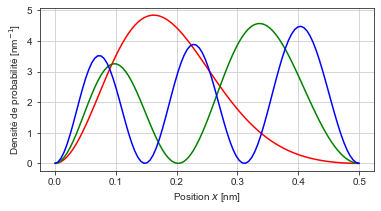

In [24]:
x = np.linspace(0, 0.5, 100)

# État fondamental
D_0 = []
for i in x:
    D_0.append(densite_prob(i, psi_0))

# État fondamental
D_1 = []
for i in x:
    D_1.append(densite_prob(i, psi_1))

# État fondamental
D_2 = []
for i in x:
    D_2.append(densite_prob(i, psi_2))


# On représente graphiquement
sns.set_style('ticks')
plt.figure(figsize=(6,3))
plt.plot(x, D_0, 'r', label='État fondamental')
plt.plot(x, D_1, 'g', label='Premier état excité')
plt.plot(x, D_2, 'b', label='Deuxième état excité')
plt.ylabel('Densité de probabilité [nm$^{-1}$]')
plt.xlabel('Position $x$ [nm]')
plt.grid()
plt.show()


On remarque que les densités de probabilité ne sont pas symétrique. C'était attendu, car le puit de potentiel n'est pas symétrique. On remarque aussi que la densité de probabilité est nulle à 0 et à 0,5 nm, ce qui est normal dans un puit de potentiel infini. Finalement, on remarque que l'état fondamental comporte un maximum, le premier état excité comporte 2 maximums et le deuxième état excité comporte 3 maximums. Ces résultats sont conformes aux attentes.

### 9.

On considère maintenant le potentiel suivant :
$$V(x) = \frac{ax^2}{L}$$
Ce qui donne l'hamiltonien suivant :
$$\hat{H} = \frac{-\hbar^2}{2M}\frac{\text{d}^2}{\text{d}x^2} + \frac{ax^2}{L}$$
On insère notre nouvel hamiltonien dans l'équation dérivée à la question 4 pour déterminer les éléments de matrice $H_{mn}$ :
$$H_{mn} = \frac{2}{L}\int_0^L\sin\frac{m\pi x}{L}\hat{H}\sin\frac{n\pi x}{L}\text{d}x$$
$$H_{mn} = \frac{2}{L}\int_0^L\sin\frac{m\pi x}{L}\bigg(\frac{-\hbar^2}{2M}\frac{\text{d}^2}{\text{d}x^2} + \frac{ax^2}{L}\bigg)\sin\frac{n\pi x}{L}\text{d}x$$
$$H_{mn} = \frac{2}{L}\int_0^L\sin\frac{m\pi x}{L}\bigg[\frac{-\hbar^2}{2M}\bigg(-\frac{\pi^2n^2}{L^2}\sin\frac{n\pi x}{L}\bigg) + \frac{ax^2}{L}\sin\frac{n\pi x}{L}\bigg]\text{d}x$$
$$H_{mn} = \frac{\hbar^2\pi^2n^2}{ML^3}\int_0^L\sin\frac{m\pi x}{L}\sin\frac{n\pi x}{L}\text{d}x + \frac{2a}{L^2}\int_0^Lx^2\sin\frac{m\pi x}{L}\sin\frac{n\pi x}{L}\text{d}x$$
On peut résoudre facilement la première intégrale grâce aux propriétés présentées à la question 4. On obtient alors
$$H_{mn} = \frac{\hbar^2\pi^2n^2}{2ML^2} + \frac{2a}{L^2}\int_0^Lx^2\sin^2\frac{n\pi x}{L}\text{d}x \qquad \text{pour $m=n$}$$
$$H_{mn} = \frac{2a}{L^2}\int_0^Lx^2\sin\frac{m\pi x}{L}\sin\frac{n\pi x}{L}\text{d}x \qquad \text{pour $m\neq n$}$$

Pour la deuxième intégrale, nous n'avons malheureusement pas de propriété qui nous permet de résoudre facilement l'intégrale. Nous nous replierons donc sur les méthodes numériques. Pour résoudre l'intégrale, on utilisera la méthode *integrate.quad* de la librairie *scipy*. Cette méthode a l'avantage de donner non seulement la valeur de l'intégrale, mais aussi une estimation de l'erreur sur le résultat. On définit la fonction *element_H_mn_2* qui calcule la valeur d'un élément de matrice pour le puit qui nous intéresse. La fonction prend en argument $m$ et $n$ et retourne l'élément de matrice en calculant l'intégrale avec *scipy.integrate.quad*. Elle retourne également l'erreur sur l'élément causée par l'intégration numérique.

In [25]:
# Détermine les éléments de la matrice H_mn
# Arguments :
# m, n : indices de l'élément
# Retourne la valeur de l'élément ainsi que son incertitude causée par l'intégration

def element_H_mn_2(m, n):
    a = 10 / (6.241509 * 10**18)
    L = 0.5 * 10**(-9)
    M = me
    def integrande(x):
        return x**2 * np.sin(n*pi*x/L) * np.sin(m*pi*x/L)
    result, err = sp.integrate.quad(integrande, 0, L)
    if m == n :
        return [(hbar**2*pi**2*n**2 / (2*M*L**2) + 2*a/(L**2) * result) * 6.241509 * 10**18, 2*a/(L**2) * err * 6.241509 * 10**18]
    else:
        return [2*a/(L**2) * result * 6.241509 * 10**18, 2*a/(L**2) * err * 6.241509 * 10**18]

On construit ensuite la matrice $H$ 10x10 dans le but de déterminer les premiers niveaux d'énergie. On aimerait toutefois pouvoir propager l'erreur sur les éléments dans le calcul des valeurs propres. Pour ce faire, on utilise la méthode *random* du module *random*, qui permet de générer une valeur aléatoire dans l'intervalle [0, 1]. On crée donc 1000 matrices $H$ 10x10 avec des valeurs aléatoires dans les intervalles d'incertitude et on calcule les valeurs propres de chacune. On prend ensuite l'écart-type de la distribution des valeurs propres obtenues pour chaque niveau afin d'estimer l'erreur sur les niveaux d'énergie calculés. Les valeurs propres sont calculées de la même façon qu'à la question 6.

In [26]:
# On définit la matrice H et la matrice d'erreur Err
H = np.zeros((10, 10))
Err = np.zeros((10, 10))
for m in range(10):
    for n in range(10):
        H[m,n], Err[m,n] = element_H_mn_2(m+1, n+1)

# On calcule les valeurs propres de la matrice H
valpropres_2 = np.linalg.eigvalsh(H).tolist()
valpropres_2.sort()

# On crée 1000 matrices H avec des valeurs extrêmes aléatoires des domaines d'incertitude
# et on calcule leurs valeurs propres en les regroupant dans des listes.
# On calcule ensuite l'écart-type des listes.
val1 = []
val2 = []
val3 = []
val4 = []
val5 = []
val6 = []
val7 = []
val8 = []
val9 = []
val10 = []

i = 0

while i < 1000:
    H_err = np.zeros((10, 10))

    # On ajoute aléatoirement + ou - l'incertitude
    for m in range(10):
        for n in range(10):
            H_err[m,n] = H[m,n] + rd.choice([-1, 1]) * Err[m,n]


    # On calcule les valeurs propres
    valpropres_err = np.linalg.eigvalsh(H_err).tolist()
    valpropres_err.sort()

    # On assigne les valeurs aux bonnes listes (méthode rustique mais ça va pour 10 valeurs)
    val1.append(valpropres_err[0])
    val2.append(valpropres_err[1])
    val3.append(valpropres_err[2])
    val4.append(valpropres_err[3])
    val5.append(valpropres_err[4])
    val6.append(valpropres_err[5])
    val7.append(valpropres_err[6])
    val8.append(valpropres_err[7])
    val9.append(valpropres_err[8])
    val10.append(valpropres_err[9])

    i += 1

# On calcule la différence entre le max et le min pour chaque valeur et on regroupe dans une liste
err_finale = []

err_finale.append(np.std(val1))
err_finale.append(np.std(val2))
err_finale.append(np.std(val3))
err_finale.append(np.std(val4))
err_finale.append(np.std(val5))
err_finale.append(np.std(val6))
err_finale.append(np.std(val7))
err_finale.append(np.std(val8))
err_finale.append(np.std(val9))
err_finale.append(np.std(val10))

print("Niveau d'énergie en eV :", valpropres_2)
print("Erreur sur chaque niveau :", err_finale)

Niveau d'énergie en eV : [1.5081946860779718, 6.032778740261774, 13.573752163619966, 24.13111495628454, 37.70486711827173, 54.29500864958549, 73.90153955022726, 96.52445982019756, 122.16376945949683, 150.81946846812497]
Erreur sur chaque niveau : [4.440892098500626e-16, 3.1034179209128977e-15, 1.861101276549754e-13, 2.7749676722829163e-11, 2.6907907229540724e-14, 7.062451665891878e-14, 6.905698283127653e-12, 9.913818585557783e-11, 1.243979777885691e-09, 1.1829873556348218e-09]


On voit que les erreurs varient de l'ordre de $10^{-16}$ à $10^{-9}$. L'erreur est également plus faible pour les premiers niveaux d'énergie. On peut se fier aux niveaux d'énergie obtenus, car l'approche statistique montre que l'effet de l'erreur causée par l'intégration numérique est négligeable pour les premiers niveaux d'énergie. On obtient des valeurs avec une précision semblable à la précision machine, qui est de $10^{-16}$.

## Question 3 - Puits de potentiel

### 10.



Débutons par définir les constantes du problème:

In [27]:
toJ = 1.602176565*10**(-19) # Facteur de conversion eV --> J
hbar = 1.054571817*10**(-34)# J s
m = 9.1094*10**(-31) # kg
w = 1*10**(-9) # largeur du puits [m]
V = 20*toJ # hauteur du puits [J]

Sachant qu'on a:

$$\tan\sqrt{w^2mE/2\hbar^2}=\begin{cases}\sqrt{(V-E)/E}\qquad \text{pour les états pairs}\\
-\sqrt{E/(V-E)}\qquad \text{pour les états impairs}\end{cases}$$

On définit:

$$y_1=\tan\sqrt{w^2mE/2\hbar^2}$$
$$y_2=\sqrt{(V-E)/E}$$
$$y_3=-\sqrt{E/(V-E)}$$

On définit la fonction *fonctions* qui retourne une liste de valeurs pour ces trois fonctions selon un *linspace* d'énergie généré à même la fonction:

In [28]:
# But: retourner une liste de valeurs des trois fonctions pour des énergies allant de 0 à max
# Arguments:
# N: nombre de divisions du linspace
# max: valeur maximale d'énergie du linspace
# w: largeur du puits en m
# V: hauteur du puits en eV

def fonctions(N, max, w, V):

    n = np.linspace(0, max, N)

    y1 = [np.tan(np.sqrt(w**2 * m * E*toJ / (2 * hbar**2))) for E in n]
    y2 = [np.sqrt((V-E) / E) for E in n]
    y3 = [-np.sqrt(E / (V-E)) for E in n]

    return y1, y2, y3, n

On peut générer une liste de 1000 valeurs pour chacune de ces fonctions afin de générer un graphique:

<ipython-input-28-fb108e2df0af>:13: RuntimeWarning: divide by zero encountered in double_scalars
  y2 = [np.sqrt((V-E) / E) for E in n]
<ipython-input-28-fb108e2df0af>:14: RuntimeWarning: divide by zero encountered in double_scalars
  y3 = [-np.sqrt(E / (V-E)) for E in n]


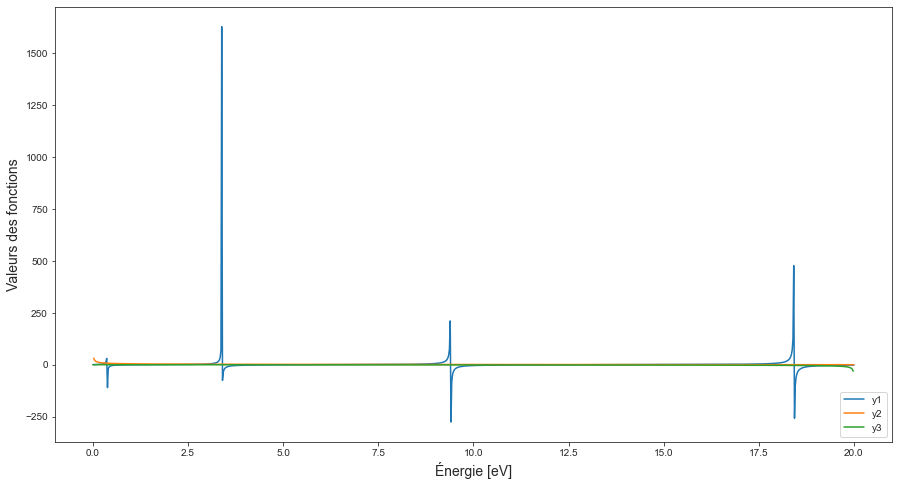

In [29]:
y1, y2, y3, E = fonctions(1000, 20, w, 20)

# On effectue le graphique
ax = plt.figure(figsize=(15,8))
plt.plot(E, y1, label='y1')
plt.plot(E, y2, label='y2')
plt.plot(E, y3, label='y3')
plt.xlabel('Énergie [eV]', fontsize=14)
plt.ylabel("Valeurs des fonctions", fontsize=14)
#plt.ylim(-10,10)

# On positionne la légende
plt.legend(loc='lower right')
plt.show()

Il est difficile de percevoir les croisements entre les fonctions à cette échelle. On peut donc dé-commenter la ligne *plt.ylim(-10,10)* afin de n'avoir que la zone d'intérêt. Voici le graphique une fois ajusté:

<center><img src="TP2_Q3_10.png" style="width: 800px;"/></center>
<center>Figure X. Fonctions y1, y2 et y3 avec solutions approximatives tracées



Les lignes verticales rouges ont été ajoutées manuellement afin d'estimer les énergies pour lesquelles les fonctions se croisent (autrement dit, les solutions de l'équation). Il est important de noter que les lignes verticales bleues sont dû au fait que *matplotlib* relie toujours un point du linspace au suivant. Cependant, sachant que la fonction $y_1$ est une tangente, on remarque que ces lignes sont en fait les asymptotes de la fonction, et ainsi leur points de croisement avec $y_2$ et $y_3$ ne sont pas des solutions du système. On ignore donc les lignes verticales bleues dans notre analyse.

On peut faire une grossière estimation de l'énergie de chacun des niveaux visuellement. On estime alors pour les six premiers états (en eV):

$E_0=0,3\\$
$E_1=1,24\\$
$E_2=3,0\\$
$E_3=5,05\\$
$E_4=8,0\\$
$E_5=11,3$

### 11.

On reformule d'abord les fonctions afin qu'elles soient égales à zéro:

États pairs:

$$\tan\sqrt{w^2mE/2\hbar^2}=\sqrt{(V-E)/E}$$

$$\tan\sqrt{w^2mE/2\hbar^2}-\sqrt{(V-E)/E}=0$$

États impairs:

$$\tan\sqrt{w^2mE/2\hbar^2}=-\sqrt{E/(V-E)}$$

$$\tan\sqrt{w^2mE/2\hbar^2}+\sqrt{E/(V-E)}=0$$

On code deux fonctions, *f_pair* et *f_impair*, qui acceptent en entrée une énergie en joules et retournent la valeur de la fonction. On code aussi la méthode de la sécante, dont le code est tiré directement des notes de cours PHY-3500, exercice 6.16:

In [30]:
# Fonction pour les niveaux pairs
def f_pair(e):
    return np.tan(np.sqrt(w**2 * m * e /(2 * hbar**2))) - np.sqrt((V-e)/e)

# Fonction pour les niveaux impairs
def f_impair(e):
    return np.tan(np.sqrt(w**2 * m * e /(2 * hbar**2))) + np.sqrt(e/(V-e))

# Méthode de la sécante directement tirée des notes de cours (méthode longue)
# Arguments:
# f: fonction dont on veut déterminer les zéros (solutions)
# e0 et e1: deux énergies [eV] près du zéro recherché pour la première itération
# target: précision souhaitée en eV
def secante(f, e0, e1, target):

    e0 = e0*toJ
    e1 = e1*toJ
    target = target*toJ

    while True:
        e2=e1-f(e1)*(e1-e0)/(f(e1)-f(e0))
        if(abs(e2-e1)<target):
            break
        e0=e1
        e1=e2

    return e2/toJ

On cherche donc, avec la méthode de la sécante, à déterminer à quelle énergie la fonction croise l'axe des abscisses, ce qui correspond aux énergie des différents niveaux. La méthode de la sécante demande qu'on choisisse deux points, *e0* et *e1*, le plus proche possible de la racine; on choisira donc les points situés à $0,04 \ eV$ de part et d'autre des estimations faites au #10. Puisque la solution est précise au millième d'eV, on conserve seulement les trois premières décimales:

In [31]:
target = 0.001

print(f"Énergie du niveau fondamental: {secante(f_pair, 0.26, 0.34, target):.3f} eV")
print(f"Énergie du premier niveau: {secante(f_impair, 1.2, 1.28, target):.3f} eV")
print(f"Énergie du second niveau: {secante(f_pair, 2.96, 3.04, target):.3f} eV")
print(f"Énergie du troisième niveau: {secante(f_impair, 5.01, 5.09, target):.3f} eV")
print(f"Énergie du quatrième niveau: {secante(f_pair, 7.96, 8.04, target):.3f} eV")
print(f"Énergie du cinquième niveau: {secante(f_impair, 11.26, 11.34, target):.3f} eV")

Énergie du niveau fondamental: 0.318 eV
Énergie du premier niveau: 1.270 eV
Énergie du second niveau: 2.851 eV
Énergie du troisième niveau: 5.050 eV
Énergie du quatrième niveau: 7.850 eV
Énergie du cinquième niveau: 11.215 eV


## Médiagraphie

[1] Computational Physics, Mark Newman, p.524-526

[2] (eigenvalues) https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigvals.html